<a href="https://colab.research.google.com/github/AyumiOsawa/UCREL_NLP_summerschool_2024/blob/main/NoteBooks/2_BigData_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-document Summaries Corpora **
The dataset is derived from publicly available WikiNews (http://www.wikinews.org/) English texts.

The source texts were under CC Attribution Licence V2.5 (cf. http://creativecommons.org/licenses/by/2.5/). Texts in other languages have been translated by native speakers of each language.

https://www.lancaster.ac.uk/staff/elhaj/corpora.html

In [1]:
!pip install gdown
!pip install plotly
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install tabulate
!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54386 sha256=c579ae0baa67d6eb7ab316f76b2767c193de73ebd2e12827a7dcad9a80db60be
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


## Step 2: Load and Prepare Data
We will load the dataset and clean it. For demonstration purposes.

In [2]:
import gdown
url = 'https://drive.google.com/uc?id=1GSRJgJaRzb1OauKtHdwNoF4UnkKAt9cK'
output = 'Multilingual-Dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GSRJgJaRzb1OauKtHdwNoF4UnkKAt9cK
To: /content/Multilingual-Dataset.zip
100%|██████████| 1.28M/1.28M [00:00<00:00, 119MB/s]


'Multilingual-Dataset.zip'

In [3]:
import zipfile
import os

if zipfile.is_zipfile(output):
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall('/content/')
    print("Files extracted:")
    print(os.listdir('/content/'))
else:
    print("Downloaded file is not a zip file.")

Files extracted:
['.config', '__MACOSX', 'SourceTexts', 'Multilingual-Dataset.zip', 'sample_data']



### Data Prepration
we need to organize the text files in the `SourceTexts` directory into subdirectories based on language identifiers extracted from the filenames. It dynamically identifies unique language codes, creates corresponding language-specific folders, and moves each file to its appropriate folder, thereby streamlining file management and access based on language.

- Arabic
- Czech
- English
- French
- Greek
- Hebrew
- Hindi

In [4]:
import os
import shutil

# Define the source directory
source_dir = 'SourceTexts'

# List all files in the source directory
files = os.listdir(source_dir)

# Create a set to store unique language identifiers
languages = set()

# Identify unique languages from filenames
for file in files:
    language = file.split('.')[1].lower()  # Normalize to lowercase
    languages.add(language)

# Create folders for each language and move corresponding files
for language in languages:
    # Create the language folder if it doesn't exist
    language_dir = os.path.join(source_dir, language)
    os.makedirs(language_dir, exist_ok=True)

    # Move files into the language folder
    for file in files:
        if file.split('.')[1].lower() == language:  # Normalize to lowercase
            shutil.move(os.path.join(source_dir, file), os.path.join(language_dir, file))

print("Files have been organized into folders.")


Files have been organized into folders.


Here we combine the content of text files from the `SourceTexts` directory into a single Pandas DataFrame, with each file's content stored as a row in the DataFrame. It then saves the DataFrame to a CSV file.

1. **Import Required Modules**:
   - The script imports the `os` module for directory and file operations and the `pandas` module for creating and manipulating the DataFrame.

In [5]:
import os
import pandas as pd


2. **Define the Function to Combine Files**:
   - A function named `combine_files_to_dataframe` is defined. This function takes a directory path as input and returns a DataFrame containing the file names and their contents.
- **Initialize an Empty List**: An empty list named `data` is created to store the file names and their contents.
- **Loop Through Files**: The function loops through all files in the specified directory using `os.listdir()`.
- **Construct Full File Path**: For each file, the full path is constructed using `os.path.join()`.
- **Check if it’s a File**: The script ensures the path is a file using `os.path.isfile()`.
- **Read File Content**: If it’s a file, the script reads its content and appends a dictionary containing the file name (`Title`) and its content (`Content`) to the `data` list.
- **Create a DataFrame**: Finally, a Pandas DataFrame is created from the `data` list and returned.

In [6]:
def combine_files_to_dataframe(directory_path):
       # Initialize an empty list to store the data
       data = []

       # Loop through all files in the directory
       for file_name in os.listdir(directory_path):
           # Construct full file path
           file_path = os.path.join(directory_path, file_name)

           # Ensure it's a file
           if os.path.isfile(file_path):
               # Read the content of each file
               with open(file_path, 'r') as file:
                   content = file.read()
                   # Append the file name and content to the data list
                   data.append({'Title': file_name, 'Content': content.strip()})

       # Create a DataFrame from the data list
       df = pd.DataFrame(data)
       return df


3. **Specify the Directory Path**:
   - The directory containing the files is specified. In this example, the directory path is `/content/SourceTexts/english`.

In [7]:
directory_path = '/content/SourceTexts/english' ## here you can change the language

4. **Combine Files into a DataFrame**:
   - The `combine_files_to_dataframe` function is called with the specified directory path, and the resulting DataFrame is stored in the variable `df`.

In [8]:
df = combine_files_to_dataframe(directory_path)

5. **Display the DataFrame**:
   - The DataFrame is printed to the console to display the combined content of the files.

In [9]:
print(df)

            Title                                            Content
0   M0009.english  Romanian artists auction off their works for t...
1   M0005.english  Saskatchewan town asks for return of "accident...
2   M0045.english  Climate Negotiations soon to conclude in Bali;...
3   M0070.english  Graner found guilty of mistreatment at Abu Ghr...
4   M0028.english  UK naval crew describe their capture and deten...
..            ...                                                ...
95  M0016.english  Five found guilty of UK bomb plot\n\nTuesday, ...
96  M0074.english  New photos of Abu Ghraib prison abuse\n\nWedne...
97  M0010.english  London bombing: Police search houses in Leeds\...
98  M0069.english  UN reports 222,570 dead in Haiti earthquake\n\...
99  M0083.english  Aircraft wreckage in Atlantic confirmed to be ...

[100 rows x 2 columns]




6. **Save the DataFrame to a CSV File**:
   - The DataFrame is saved to a CSV file named `combined_files.csv` without the index using the `to_csv` method.

In [10]:
df.to_csv('combined_files.csv', index=False)


---

> The following code cell is designed to perform the combined operations described above. Let's execute it to see the results.
---

In [11]:
import os
import pandas as pd

def combine_files_to_dataframe(directory_path):
    # Initialize an empty list to store the data
    data = []

    # Loop through all files in the directory
    for file_name in os.listdir(directory_path):
        # Construct full file path
        file_path = os.path.join(directory_path, file_name)

        # Ensure it's a file
        if os.path.isfile(file_path):
            # Read the content of each file
            with open(file_path, 'r') as file:
                content = file.read()
                # Append the file name and content to the data list
                data.append({'Title': file_name, 'Content': content.strip()})

    # Create a DataFrame from the data list
    df = pd.DataFrame(data)
    return df

# Specify the directory containing the files
directory_path = '/content/SourceTexts/english'

# Combine the files into a DataFrame
df = combine_files_to_dataframe(directory_path)

# Display the DataFrame
print(df)

# save the DataFrame to a CSV file
df.to_csv('combined_files.csv', index=False)

            Title                                            Content
0   M0009.english  Romanian artists auction off their works for t...
1   M0005.english  Saskatchewan town asks for return of "accident...
2   M0045.english  Climate Negotiations soon to conclude in Bali;...
3   M0070.english  Graner found guilty of mistreatment at Abu Ghr...
4   M0028.english  UK naval crew describe their capture and deten...
..            ...                                                ...
95  M0016.english  Five found guilty of UK bomb plot\n\nTuesday, ...
96  M0074.english  New photos of Abu Ghraib prison abuse\n\nWedne...
97  M0010.english  London bombing: Police search houses in Leeds\...
98  M0069.english  UN reports 222,570 dead in Haiti earthquake\n\...
99  M0083.english  Aircraft wreckage in Atlantic confirmed to be ...

[100 rows x 2 columns]


## Step 3: Data Cleaning

Enhances the readability and usability of text data by:
1. Removing HTML tags using the `BeautifulSoup` library.
2. Cleaning the text with regular expressions to replace multiple spaces, remove standalone numbers, and trim whitespace.
3. Loading the original text data from a CSV file into a DataFrame.
4. Applying the text cleaning process to the 'Content' column and storing the cleaned text in a new column named 'clean_content'.

In [12]:
import pandas as pd
import re
from bs4 import BeautifulSoup

2. **Define a Function to Clean HTML**:
   - A function named `clean_html` is defined to remove HTML tags from a string. It uses `BeautifulSoup` to parse the HTML and extract the text content.
- **Parameter**: `raw_html` - The raw HTML string to be cleaned.
- **Processing**: `BeautifulSoup` parses the HTML and the `get_text()` method extracts the text content.
- **Return**: The cleaned text without HTML tags.

In [13]:
def clean_html(raw_html):
       """Remove HTML tags from a string"""
       soup = BeautifulSoup(raw_html, "html.parser")
       return soup.get_text()

3. **Define a Function to Clean Text**:
  - A function named `clean_text` is defined to clean the text by removing unwanted patterns and extra spaces. It first removes HTML tags using the `clean_html` function and then applies various regular expressions to clean the text further.
- **Parameter**: `text` - The text string to be cleaned.
- **Processing**:
     - `clean_html(text)`: Removes HTML tags.
     - `re.sub(r'\s+', ' ', text)`: Replaces multiple spaces and newlines with a single space.
     - `re.sub(r'\b\d+\b', '', text)`: Removes standalone numbers (optional, based on specific needs).
     - `text.strip()`: Removes leading and trailing spaces.
- **Return**: The cleaned text.

In [14]:
def clean_text(text):
       """Remove unwanted text patterns and clean the text"""
       text = clean_html(text)
       text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
       text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers if needed
       text = text.strip()  # Remove leading/trailing spaces
       return text

4. **Load the DataFrame**:
   - The script loads a DataFrame from a CSV file named `combined_files.csv` using the `pandas` library.


In [15]:
df = pd.read_csv('combined_files.csv')

5. **Apply Preprocessing to the 'Content' Column**:
   - The script applies the `clean_text` function to each entry in the 'Content' column of the DataFrame, creating a new column 'clean_content' with the cleaned text.
- **Processing**: The `apply` method is used to apply the `clean_text` function to each row in the 'Content' column.
- **Result**: A new column 'clean_content' is added to the DataFrame containing the cleaned text.

In [16]:
df['clean_content'] = df['Content'].apply(clean_text)


---

> The following code cell is designed to perform the combined operations described above. Let's execute it to see the results.
---

In [17]:
import pandas as pd
import re
from bs4 import BeautifulSoup

def clean_html(raw_html):
    """Remove HTML tags from a string"""
    soup = BeautifulSoup(raw_html, "html.parser")
    return soup.get_text()

def clean_text(text):
    """Remove unwanted text patterns and clean the text"""
    text = clean_html(text)
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces/newlines with a single space
    text = re.sub(r'\b\d+\b', '', text)  # Remove standalone numbers if needed
    text = text.strip()  # Remove leading/trailing spaces
    return text


# Load your DataFrame
df = pd.read_csv('combined_files.csv')

# Apply preprocessing to the 'Content' column
df['clean_content'] = df['Content'].apply(clean_text)


In [22]:
df.head(5)

,Title,Content,clean_content
0,M0009.english,Romanian artists auction off their works for t...,Romanian artists auction off their works for t...
1,M0005.english,"Saskatchewan town asks for return of ""accident...","Saskatchewan town asks for return of ""accident..."
2,M0045.english,Climate Negotiations soon to conclude in Bali;...,Climate Negotiations soon to conclude in Bali;...
3,M0070.english,Graner found guilty of mistreatment at Abu Ghr...,Graner found guilty of mistreatment at Abu Ghr...
4,M0028.english,UK naval crew describe their capture and deten...,UK naval crew describe their capture and deten...


## Step 4: Load the SpaCy Model and Tokenizer
Load the SpaCy English model, which will be used for tokenization, parsing, and named entity recognition. Recreate the tokenizer with the updated stopwords list.
    


In [18]:
import spacy
from spacy.tokenizer import Tokenizer
import pandas as pd
from tabulate import tabulate

In [23]:
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)


## Step 5: Tokenize and Filter Text
- The `tokenize_and_filter` function processes text to remove stop words, punctuation, and empty tokens.
- This function is applied to a DataFrame column `'clean_content'`, resulting in a new column of filtered tokens `'tokens'`.


In [25]:
def tokenize_and_filter(text):
    """Tokenize the text and filter out stop words, punctuation, and empty tokens
      - **Input:** A string of text.
      - **Output:** A list of filtered tokens (words)
    """
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and token.text.strip()]
    return tokens

# Apply tokenization to the 'clean_content' column
df['tokens'] = df['clean_content'].apply(tokenize_and_filter)

# Display the DataFrame with tokens
print(df[['Title', 'tokens']])


            Title                                             tokens
0   M0009.english  [Romanian, artists, auction, works, tsunami, v...
1   M0005.english  [Saskatchewan, town, asks, return, accidental,...
2   M0045.english  [Climate, Negotiations, soon, conclude, Bali, ...
3   M0070.english  [Graner, found, guilty, mistreatment, Abu, Ghr...
4   M0028.english  [UK, naval, crew, describe, capture, detention...
..            ...                                                ...
95  M0016.english  [found, guilty, UK, bomb, plot, Tuesday, men, ...
96  M0074.english  [New, photos, Abu, Ghraib, prison, abuse, Wedn...
97  M0010.english  [London, bombing, Police, search, houses, Leed...
98  M0069.english  [UN, reports, dead, Haiti, earthquake, Thursda...
99  M0083.english  [Aircraft, wreckage, Atlantic, confirmed, miss...

[100 rows x 2 columns]



## Step 5: Create a Directory for Plots
Create a new directory named 'plots' to store generated plots. This helps keep the workspace organized.
    


In [26]:
!mkdir plots

### Get casting Image

In [30]:
import gdown
# url = 'https://drive.google.com/uc?id=1WoIBqqLufm9Ou3toI5uKVIcRuC-_Qswh'
# output = 'Mic.png'
url = 'https://github.com/UCREL/Session1_Visualisation_and_Summarisation/blob/main/static/images/cloud.png'
output = 'cloud.png'
gdown.download(url, output, quiet=False)

Downloading...
From: https://github.com/UCREL/Session1_Visualisation_and_Summarisation/blob/main/static/images/cloud.png
To: /content/cloud.png
266kB [00:00, 39.7MB/s]


'cloud.png'

###  Get Font:

In [33]:
import gdown
url = 'https://drive.google.com/uc?id=1HwUK9hixOUcF_8mrpP2nD4zbyMA0utz2'
output = 'font.ttf'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1HwUK9hixOUcF_8mrpP2nD4zbyMA0utz2
To: /content/font.ttf
100%|██████████| 225k/225k [00:00<00:00, 37.1MB/s]


'font.ttf'

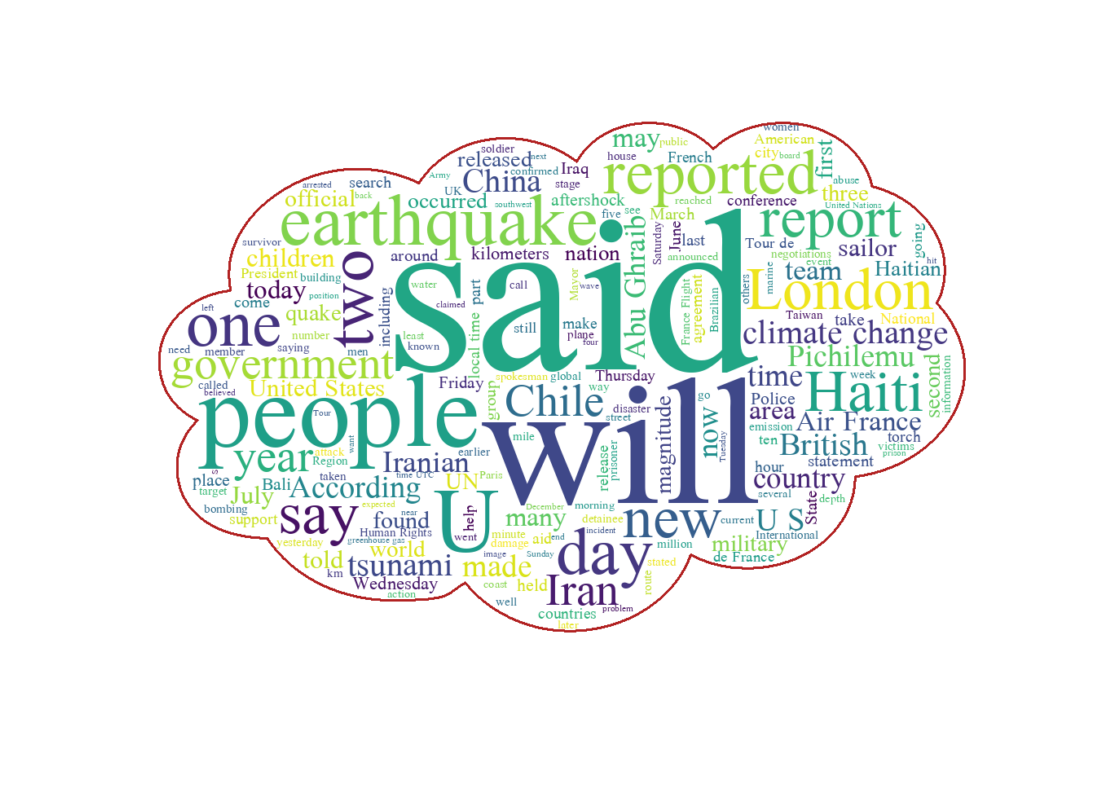

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def remove_stop_words(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

def visualize_word_cloud(texts, mask_path, font_path):
    # Combine all texts into one string
    all_words = ' '.join(texts)

    # Load a mask image for custom shape
    mask = np.array(Image.open(mask_path))  # mask image path

    # Define stop words
    stopwords = set(STOPWORDS)

    # Create a WordCloud object with additional customization
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        max_words=200,
        stopwords=stopwords,
        mask=mask,  # Use mask for custom shape
        contour_width=3,
        contour_color='firebrick',
        colormap='viridis',  # Color theme
        width=800,
        height=400,
        random_state=42
    ).generate(all_words)

    # Display the word cloud
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('plots/Word_Cloud _tokens.png')
    plt.show()
    plt.show()


visualize_word_cloud(df['clean_content'], 'cloud.png', 'font.ttf')



## Step 6: Extract Linguistic Annotations
Extract part of speech tags and dependencies for each token and display them in a DataFrame.
    


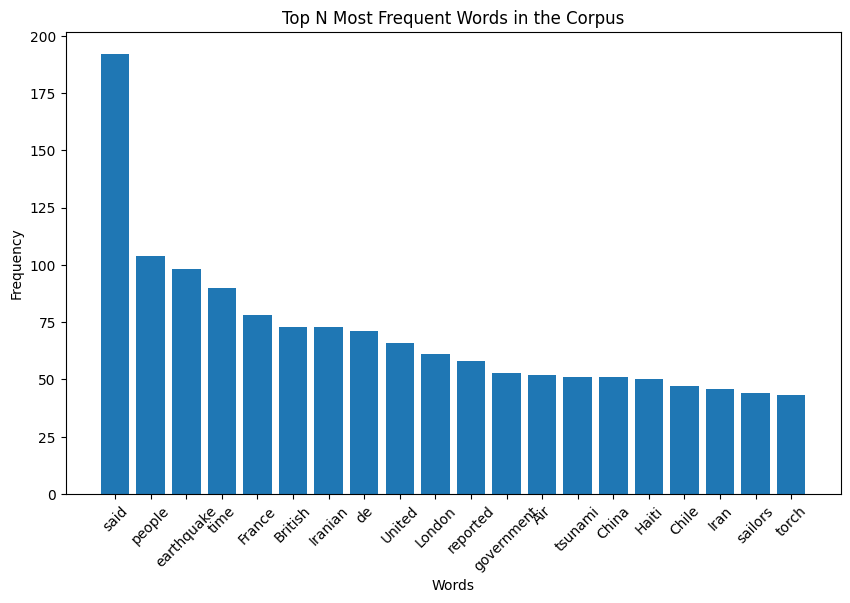

In [37]:
from collections import Counter

# Combine all tokens in the corpus
all_tokens = ' '.join(df['clean_content'].apply(remove_stop_words)).split()

# Get the top N most frequent words
N = 20
most_common_tokens = Counter(all_tokens).most_common(N)

# Plot the top N most frequent words
tokens, counts = zip(*most_common_tokens)
plt.figure(figsize=(10, 6))
plt.bar(tokens, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top N Most Frequent Words in the Corpus')
plt.xticks(rotation=45)
plt.savefig('plots/top_20_tokens.png')
plt.show()


Entity Recognition Analysis

Syntactic Dependency Analysis


## Step 7: Visualize Syntactic Dependencies
Use SpaCy's displaCy visualizer to create an interactive diagram of the sentence's syntactic dependencies.
    

In [38]:
# Visualize syntactic dependencies of the first sentence of the first document
from spacy import displacy
def visualize_syntactic_dependencies(text):
    doc = nlp(text)
    first_sentence = list(doc.sents)[0]
    displacy.render(first_sentence, style='dep', jupyter=True)

# Visualize for the first document as an example
visualize_syntactic_dependencies(df['clean_content'].iloc[0])


## Step 8: Named Entity Recognition (NER)
Extract and display named entities from the text. Visualize entities using SpaCy's displaCy visualizer.
    

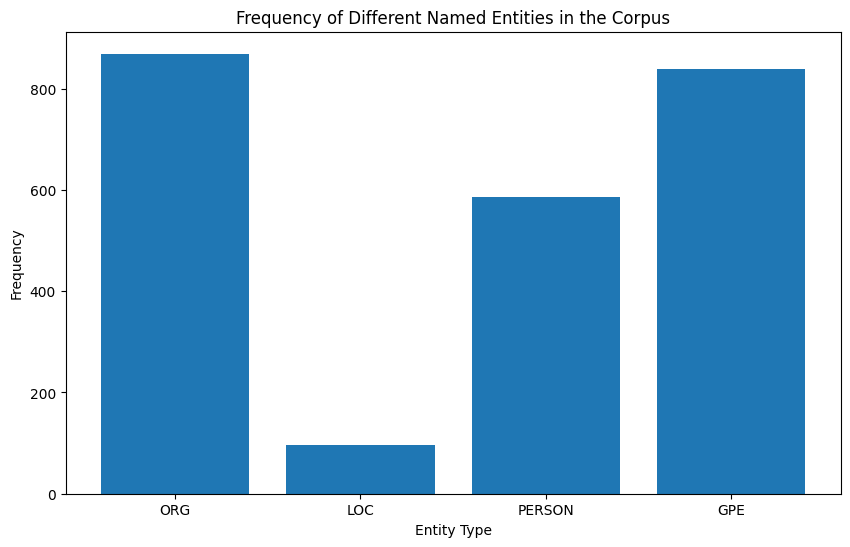

In [39]:
# Extract entities from the corpus
entity_labels = ['PERSON', 'ORG', 'GPE', 'LOC']
entity_counts = Counter()

for text in df['clean_content']:
    doc = nlp(text)
    entities = [ent.label_ for ent in doc.ents if ent.label_ in entity_labels]
    entity_counts.update(entities)

# Plot the frequency of different named entities
labels, counts = zip(*entity_counts.items())
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Frequency of Different Named Entities in the Corpus')
plt.show()


In [40]:
# Step 8: Visualize Syntactic Dependencies and Extract Entity Details
def visualize_and_extract_entities(text):
    """Visualize syntactic dependencies and extract entity details for the first sentence"""
    doc = nlp(text)
    first_sentence = list(doc.sents)[0]  # Get the first sentence
    #displacy.render(first_sentence, style='dep', jupyter=True)
    # Visualize entities
    displacy.render(doc, style="ent")

    # Extract entity details
    data = [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]
    headers = ['Entity', 'Start Char', 'End Char', 'Label']
    print(tabulate(data, headers=headers, tablefmt="pretty"))

# Visualize and extract entities for the first sentence of the first document
first_text = df['clean_content'].iloc[0]
visualize_and_extract_entities(first_text)

+------------------------------------+------------+----------+-------------+
|               Entity               | Start Char | End Char |    Label    |
+------------------------------------+------------+----------+-------------+
|              Romanian              |     0      |    8     |    NORP     |
|         Thursday, January          |     61     |    78    |    DATE     |
|              Romanian              |    100     |   108    |    NORP     |
|    the Radio Hall in Bucharest     |    148     |   175    |     ORG     |
|          Sunday, January           |    179     |   194    |    DATE     |
|            Indian Ocean            |    248     |   260    |     LOC     |
|              December              |    272     |   280    |    DATE     |
|              Romanian              |    304     |   312    |    NORP     |
|                Asia                |    335     |   339    |     LOC     |
| The Reporter Foundation of Romania |    354     |   388    |     ORG     |

# **word tree** [(google charts) ](https://developers.google.com/chart/interactive/docs/gallery/wordtree)


1. **Combine Titles and Content:**
   The combined text is created by joining the `Title` and `clean_content` columns of your DataFrame. Ensure you handle any special characters that might interfere with JavaScript strings.

2. **Generate Word Tree HTML:**
   The `generate_word_tree_html` function creates the HTML and JavaScript necessary to render the Word Tree. It uses Google Charts to create the visualization. Note the handling of special characters within the `combined_text` to avoid breaking the JavaScript code.

3. **Interactive Widget:**
   An `ipywidgets.Text` widget is created for the user to input the search word. The `display_word_tree` function generates and displays the Word Tree whenever the input value changes.

4. **Display the Initial Word Tree:**
   The initial call to `display_word_tree(None)` ensures the Word Tree is displayed as soon as the notebook runs, with the default search word.


In [42]:
!pip install networkx matplotlib spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


---

> **For demonstration purposes, we will use the summarised data here.**

---

In [43]:
import gdown
url = 'https://drive.google.com/uc?id=1OmIg0exqU7kirt6SDeRKFkLTFPVu41ws'
output = 'summarized_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1OmIg0exqU7kirt6SDeRKFkLTFPVu41ws
To: /content/summarized_data.csv
100%|██████████| 75.1k/75.1k [00:00<00:00, 16.5MB/s]


'summarized_data.csv'

In [44]:
import pandas as pd
from IPython.core.display import display, HTML
import ipywidgets as widgets


# df = pd.read_csv('/content/summarized_data.csv')
df = pd.read_csv('summarized_data.csv')
# Combine titles and summaries into a single text block for the Word Tree
combined_text = '. '.join(df['Title'] + ': ' + df['clean_content'])

# Additional sanitization function to handle special characters
def sanitize_text(text):
    text = text.replace('"', '\\"')
    text = text.replace("'", "\\'")
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\\', '\\\\')
    return text

# Sanitize combined text
safe_text = sanitize_text(combined_text)


# Function to generate the HTML and JavaScript for the Word Tree
def generate_word_tree_html(search_word):
    # Limit text length to avoid exceeding browser's JavaScript limits
    safe_text_chunk = safe_text[:1000]
    print("Using Text Chunk (first 1000 chars):", safe_text_chunk[:1000])  # Debug: Print the first 1000 characters of the chunk

    return f"""
    <!DOCTYPE html>
    <html>
      <head>
        <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
        <script type="text/javascript">
          google.charts.load('current', {{packages:['wordtree']}});
          google.charts.setOnLoadCallback(drawChart);
          function drawChart() {{
            var data = google.visualization.arrayToDataTable([
              ['Phrases'],
              ["{safe_text_chunk}"]
            ]);

            var options = {{
              wordtree: {{
                format: 'implicit',
                type: 'double',
                word: '{search_word}'
              }}
            }};

            var chart = new google.visualization.WordTree(document.getElementById('wordtree_basic'));
            chart.draw(data, options);
          }}
        </script>
      </head>
      <body>
        <div id="wordtree_basic" style="width: 100%; height: 600px;"></div>
      </body>
    </html>
    """

# Create an input widget
search_word_input = widgets.Text(
    value='the',
    placeholder='Enter a search word',
    description='Search word:',
    disabled=False
)

# Function to display the Word Tree
def display_word_tree(change):
    search_word = search_word_input.value
    word_tree_html = generate_word_tree_html(search_word)
    display(HTML(word_tree_html))

# Attach the function to the input widget
search_word_input.observe(display_word_tree, names='value')

# Display the input widget
display(search_word_input)

# Initial display of the Word Tree
display_word_tree(None)


Text(value='the', description='Search word:', placeholder='Enter a search word')

Using Text Chunk (first 1000 chars): M0009: Romanian artists auction off their works for tsunami victims Thursday, January ,  Several prominent Romanian artists and celebrities will gather at the Radio Hall in Bucharest on Sunday, January , to raise money for the victims of the catastrophic Indian Ocean tsunami of December , . In an event titled Romanian Artists in Support of Asia, organised by The Reporter Foundation of Romania, artists will auction off their works, as well as personal objects, with all proceeds being donated to the relief efforts for the tsunami victims. Media celebrities such as the soprano Felicia Filip and singers Angela Similea and Dida Dragan will also be participating, as well as Maia Morgenstern, known internationally for her role in the film The Passion of the Christ. All ambassadors accredited in Bucharest, as well as political personalities, have been invited to participate. Romanian Artists in Support of Asia is the second major public event organised in R

     Entity    Label
0  Romanian     NORP
1  Romanian     NORP
2      Asia      LOC
3    second  ORDINAL
4   Romania      GPE


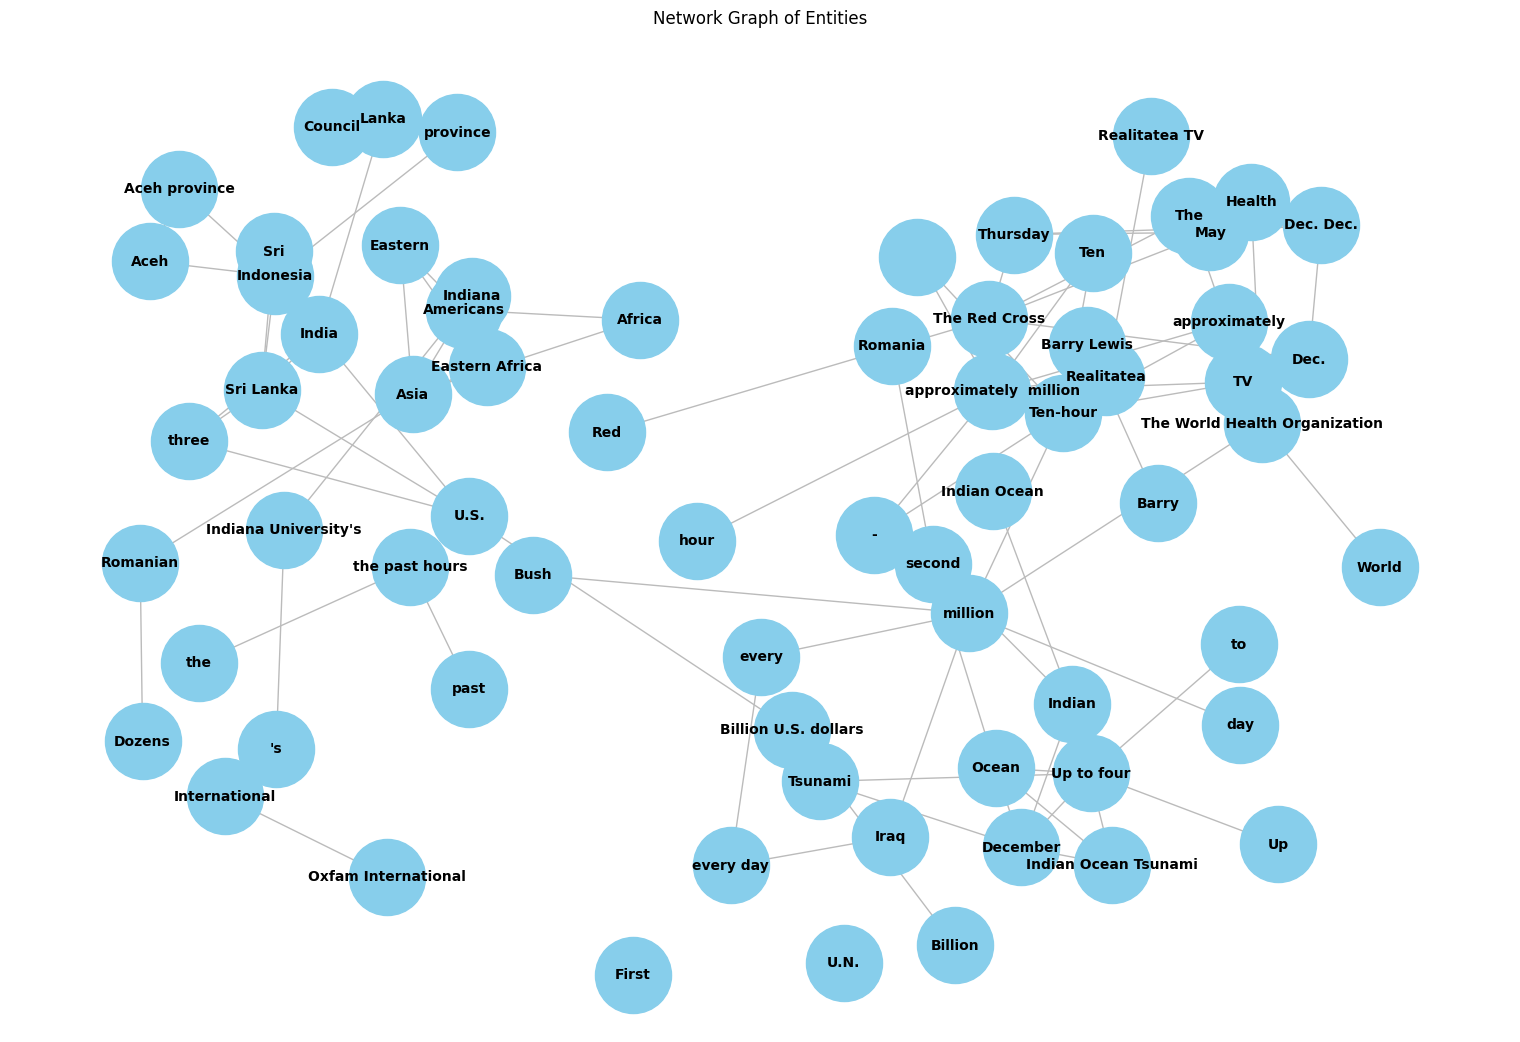

In [45]:
import pandas as pd
import re
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

df = pd.read_csv('summarized_data.csv')
# df = pd.read_csv('/content/summarized_data.csv')

# Combine all summaries into a single text block for analysis
combined_text = ' '.join(df['summary_transformer'])

# Process text with Spacy
doc = nlp(combined_text)

# Extract entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Create a DataFrame for entities
entities_df = pd.DataFrame(entities, columns=['Entity', 'Label'])

# Show the first few rows of entities_df
print(entities_df.head())

# Create a network graph
G = nx.Graph()

# Add nodes and edges
for entity in doc.ents:
    G.add_node(entity.text, label=entity.label_)
    for token in entity.root.head.subtree:
        if token != entity.root and token.ent_type_:
            G.add_edge(entity.text, token.text)

# Draw the network graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="#BBBBBB")
plt.title('Network Graph of Entities')
plt.show()


In [46]:
import plotly.graph_objects as go
# Combine all summaries into a single text block for analysis
combined_text = ' '.join(df['summary_transformer'])

# Process text with Spacy
doc = nlp(combined_text)

# Create a network graph
G = nx.Graph()

# Add nodes and edges based on entities and POS tags
for token in doc:
    if token.ent_type_:
        # Add POS tag as a node attribute
        G.add_node(token.text, label=token.ent_type_, POS=token.pos_)
        for child in token.children:
            if child.ent_type_:
                G.add_edge(token.text, child.text)

# Generate positions for the nodes
pos = nx.spring_layout(G, k=0.5)

# Assign positions to the nodes in the graph
for node in G.nodes:
    G.nodes[node]['pos'] = pos[node]

# Extract edge traces for visualization
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Extract node traces for visualization
node_x = []
node_y = []
node_text = []

for node in G.nodes:
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node} ({G.nodes[node]['label']})")

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Create plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Network Graph of Entities and POS',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper")],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))

fig.show()

In [47]:

# Combine all summaries into a single text block for analysis
combined_text = ' '.join(df['summary_transformer'])

# Process text with Spacy
doc = nlp(combined_text)

# Define specific entities to highlight
highlight_entities = ["Haiti", "earthquake", "communication"]

# Create a network graph
G = nx.Graph()

# Add nodes and edges based on entities and POS tags
for token in doc:
    if token.ent_type_ or token.text in highlight_entities:
        # Add POS tag as a node attribute
        G.add_node(token.text, label=token.ent_type_, POS=token.pos_, color='red' if token.text in highlight_entities else 'skyblue')
        for child in token.children:
            if child.ent_type_ or child.text in highlight_entities:
                G.add_edge(token.text, child.text)

# Generate positions for the nodes
pos = nx.spring_layout(G, k=0.5)

# Assign positions to the nodes in the graph
for node in G.nodes:
    G.nodes[node]['pos'] = pos[node]

# Extract edge traces for visualization
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Extract node traces for visualization
node_x = []
node_y = []
node_text = []
node_color = []

for node in G.nodes:
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node} ({G.nodes[node]['label']})")
    node_color.append(G.nodes[node]['color'])

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=node_color,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Create plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Network Graph of Entities and POS with Highlights',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper")],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))

fig.show()

2. Show Network Graph for Specific Words


1. **Data Preparation**:
   - The `clean_html` function removes HTML tags.
   - The `clean_text` function removes extra spaces, standalone numbers, and trims leading/trailing spaces.
   - The `summa_summarize` function summarizes the cleaned text.

2. **Entity Extraction**:
   - Use Spacy to process the combined text and extract entities.

3. **Build Graph**:
   - Create a network graph using `networkx`.
   - Add nodes for each entity and edges to show relationships.

4. **Visualize**:
   - Use `matplotlib` to visualize the network graph.

In [48]:
import pandas as pd
import re
import spacy
import networkx as nx
import plotly.graph_objects as go

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

# Combine all summaries into a single text block for analysis
combined_text = ' '.join(df['summary_transformer'])

# Process text with Spacy
doc = nlp(combined_text)

# Create a network graph
G = nx.Graph()

# Add nodes and edges based on specific words and their connections
specific_words = ['government', 'people','Qaeda']

for token in doc:
    if token.text in specific_words:
        G.add_node(token.text, label=token.pos_)
        for child in token.children:
            G.add_node(child.text, label=child.pos_)
            G.add_edge(token.text, child.text)

# Generate positions for the nodes
pos = nx.spring_layout(G, k=0.5)

# Assign positions to the nodes in the graph
for node in G.nodes:
    G.nodes[node]['pos'] = pos[node]

# Extract edge traces for visualization
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Extract node traces for visualization
node_x = []
node_y = []
node_text = []

for node in G.nodes:
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node} ({G.nodes[node]['label']})")

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Create plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Network Graph for Specific Words',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper")],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))

fig.show()


In [49]:

import pandas as pd
import re
import spacy
import networkx as nx
import plotly.graph_objects as go

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

# Combine all summaries into a single text block for analysis
combined_text = ' '.join(df['summary_transformer'])

# Process text with Spacy
doc = nlp(combined_text)

# Create a network graph
G = nx.Graph()

# Add nodes and edges based on entities and POS tags
highlight_entity = 'PERSON'  # Change to the entity type you want to highlight

for token in doc:
    if token.ent_type_:
        # Add POS tag as a node attribute
        G.add_node(token.text, label=token.ent_type_, POS=token.pos_)
        for child in token.children:
            if child.ent_type_:
                G.add_edge(token.text, child.text)

# Generate positions for the nodes
pos = nx.spring_layout(G, k=0.5)

# Assign positions to the nodes in the graph
for node in G.nodes:
    G.nodes[node]['pos'] = pos[node]

# Extract edge traces for visualization
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Extract node traces for visualization
node_x = []
node_y = []
node_text = []
node_color = []
node_size = []

for node in G.nodes:
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node} ({G.nodes[node]['label']})")
    if G.nodes[node]['label'] == highlight_entity:
        node_color.append('red')
        node_size.append(20)
    else:
        node_color.append('skyblue')
        node_size.append(10)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        color=node_color,
        size=node_size,
        line=dict(width=2),
        showscale=True,
        colorscale='YlGnBu',
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )))

# Create plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Network Graph of Entities with Highlighted Entities',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper")],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))

fig.show()





In [50]:
import pandas as pd
import re
import spacy
import networkx as nx
import plotly.graph_objects as go
from collections import Counter
import ipywidgets as widgets
from IPython.display import display

# Load Spacy model
nlp = spacy.load("en_core_web_sm")


# Combine all summaries into a single text block for analysis
combined_text = ' '.join(df['summary_transformer'])

# Process text with Spacy
doc = nlp(combined_text)

# Create a network graph
G = nx.Graph()

# Add nodes and edges based on entities and POS tags
highlight_entity = 'PERSON'  # Change to the entity type you want to highlight

for token in doc:
    if token.ent_type_:
        # Add POS tag as a node attribute
        G.add_node(token.text, label=token.ent_type_, POS=token.pos_)
        for child in token.children:
            if child.ent_type_:
                G.add_edge(token.text, child.text)

# Generate positions for the nodes
pos = nx.spring_layout(G, k=0.3)

# Assign positions to the nodes in the graph
for node in G.nodes:
    G.nodes[node]['pos'] = pos[node]

# Extract edge traces for visualization
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Extract node traces for visualization
node_x = []
node_y = []
node_text = []
node_color = []
node_size = []

for node in G.nodes:
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node} ({G.nodes[node]['label']})")
    degree = G.degree[node]
    if G.nodes[node]['label'] == highlight_entity:
        node_color.append('red')
        node_size.append(15 + degree * 2)
    else:
        node_color.append(degree)
        node_size.append(10 + degree * 2)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        color=node_color,
        size=node_size,
        colorscale='Viridis',
        colorbar=dict(
            thickness=15,
            title='Node Degree',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)),
    textfont=dict(
        size=12,
        color='black'
    ))

# Create plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Enhanced Interactive Network Graph of Entities with Highlighted Entities',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper")],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))

fig.show()

# Word Search Widget
def word_search_callback(b):
    search_word = word_search_input.value.lower()
    if not search_word:
        return

    # Find contexts for the search word
    word_contexts = []
    for token in doc:
        if token.text.lower() == search_word:
            for child in token.children:
                word_contexts.append(child.text.lower())
            for ancestor in token.ancestors:
                word_contexts.append(ancestor.text.lower())

    # Count word frequencies before and after the search word
    word_counts = Counter(word_contexts)
    most_common_words = word_counts.most_common(10)

    if most_common_words:
        words, counts = zip(*most_common_words)
    else:
        words, counts = [], []

    # Create bar chart for most common words around the search word
    bar_chart = go.Figure([go.Bar(x=words, y=counts)])
    bar_chart.update_layout(title=f"Most Frequent Words Around '{search_word}'",
                            xaxis_title="Words",
                            yaxis_title="Frequency")
    bar_chart.show()

# Create text input and button widgets
word_search_input = widgets.Text(
    value='',
    placeholder='Enter a search word',
    description='Search word:',
    disabled=False
)
word_search_button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to search for the word'
)

# Set up the button click event
word_search_button.on_click(word_search_callback)

# Display the widgets
display(word_search_input)
display(word_search_button)


Text(value='', description='Search word:', placeholder='Enter a search word')

Button(description='Search', style=ButtonStyle(), tooltip='Click to search for the word')

In [51]:
import pandas as pd
import re
import spacy
import networkx as nx
import plotly.graph_objects as go
from collections import Counter
import ipywidgets as widgets
from IPython.display import display

# Load Spacy model
nlp = spacy.load("en_core_web_sm")

# Combine all summaries into a single text block for analysis
combined_text = ' '.join(df['summary_transformer'])

# Process text with Spacy
doc = nlp(combined_text)

# Create a network graph
G = nx.Graph()

# Add nodes and edges based on entities and POS tags
highlight_entity = 'PERSON'  # Change to the entity type you want to highlight

for token in doc:
    if token.ent_type_:
        # Add POS tag as a node attribute
        G.add_node(token.text, label=token.ent_type_, POS=token.pos_)
        for child in token.children:
            if child.ent_type_:
                G.add_edge(token.text, child.text)

# Generate positions for the nodes
pos = nx.spring_layout(G, k=0.3)

# Assign positions to the nodes in the graph
for node in G.nodes:
    G.nodes[node]['pos'] = pos[node]

# Extract edge traces for visualization
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Extract node traces for visualization
node_x = []
node_y = []
node_text = []
node_color = []
node_size = []

for node in G.nodes:
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node} ({G.nodes[node]['label']})")
    degree = G.degree[node]
    if G.nodes[node]['label'] == highlight_entity:
        node_color.append('red')
        node_size.append(15 + degree * 2)
    else:
        node_color.append(degree)
        node_size.append(10 + degree * 2)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        color=node_color,
        size=node_size,
        colorscale='Viridis',
        colorbar=dict(
            thickness=15,
            title='Node Degree',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)),
    textfont=dict(
        size=12,
        color='black'
    ))

# Create plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Enhanced Interactive Network Graph of Entities with Highlighted Entities',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper")],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)))

fig.show()

# Word Search Widget
def word_search_callback(b):
    search_word = word_search_input.value.lower()
    if not search_word:
        return

    # Find contexts for the search word
    word_contexts = []
    for token in doc:
        if token.text.lower() == search_word:
            for child in token.children:
                word_contexts.append(child.text.lower())
            for ancestor in token.ancestors:
                word_contexts.append(ancestor.text.lower())

    # Count word frequencies before and after the search word
    word_counts = Counter(word_contexts)
    most_common_words = word_counts.most_common(10)

    if most_common_words:
        words, counts = zip(*most_common_words)
    else:
        words, counts = [], []

    # Create a network graph for the search word
    search_graph = nx.Graph()
    search_graph.add_node(search_word, size=40)

    for word, count in most_common_words:
        search_graph.add_node(word, size=20 + count*2)
        search_graph.add_edge(search_word, word, weight=count)

    pos = nx.spring_layout(search_graph)

    edge_x = []
    edge_y = []

    for edge in search_graph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    node_text = []
    node_size = []

    for node in search_graph.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(node)
        node_size.append(search_graph.nodes[node]['size'])

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        textposition='top center',
        hoverinfo='text',
        marker=dict(
            size=node_size,
            colorscale='YlGnBu',
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line=dict(width=2)),
        textfont=dict(
            size=12,
            color='black'
        ))

    search_fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=f'Network Graph for "{search_word}"',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[dict(
                            text="",
                            showarrow=False,
                            xref="paper", yref="paper")],
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False)))

    search_fig.show()

# Create text input and button widgets
word_search_input = widgets.Text(
    value='',
    placeholder='Enter a search word',
    description='Search word:',
    disabled=False
)
word_search_button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='success',
    tooltip='Click to search for the word'
)

# Set up the button click event
word_search_button.on_click(word_search_callback)

# Display the widgets
display(word_search_input)
display(word_search_button)


Text(value='', description='Search word:', placeholder='Enter a search word')

Button(button_style='success', description='Search', style=ButtonStyle(), tooltip='Click to search for the wor…

In [52]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00


In [53]:
import pandas as pd
import re
import spacy
import networkx as nx
from collections import Counter
import ipywidgets as widgets
from IPython.display import display, IFrame
from pyvis.network import Network

# Load Spacy model
nlp = spacy.load("en_core_web_sm")




# Combine all summaries into a single text block for analysis
combined_text = ' '.join(df['summary_transformer'])

# Process text with Spacy
doc = nlp(combined_text)

# Word Search Widget
def word_search_callback(b):
    search_word = word_search_input.value.lower()
    if not search_word:
        return

    # Find contexts for the search word
    word_contexts = []
    for token in doc:
        if token.text.lower() == search_word:
            for child in token.children:
                word_contexts.append(child.text.lower())
            for ancestor in token.ancestors:
                word_contexts.append(ancestor.text.lower())

    # Count word frequencies before and after the search word
    word_counts = Counter(word_contexts)
    most_common_words = word_counts.most_common(10)

    if most_common_words:
        words, counts = zip(*most_common_words)
    else:
        words, counts = [], []

    # Debug: Print the most common words and counts
    print("Most Common Words and Counts:", list(zip(words, counts)))

    # Create a network graph for the search word
    search_graph = nx.Graph()
    search_graph.add_node(search_word, size=60)

    for word, count in most_common_words:
        search_graph.add_node(word, size=20 + count*2)
        search_graph.add_edge(search_word, word, weight=count)

    # Debug: Print nodes and edges
    print("Nodes:", search_graph.nodes(data=True))
    print("Edges:", search_graph.edges(data=True))

    # Create interactive network graph using pyvis
    net = Network(notebook=True, height='750px', width='100%', cdn_resources='in_line')

    # Add the main node
    net.add_node(search_word, label=search_word, title=search_word, color='gray', size=60, font={'size': 32, 'face': 'Arial'})

    # Add nodes and edges
    for word, count in most_common_words:
        node_color = 'blue'
        node_size = 30 + count * 5
        font_size = max(6, int(node_size / 2))
        edge_length = 1 / count  # Inversely proportional to frequency
        net.add_node(word, label=word, title=word, color=node_color, size=node_size, font={'size': font_size, 'face': 'Arial'})
        net.add_edge(search_word, word, value=count, title=f'Weight: {count}', color='grey', length=edge_length)

    net.show("network_graph.html")

    display(IFrame('network_graph.html', width=750, height=750))

# Create text input and button widgets
word_search_input = widgets.Text(
    value='',
    placeholder='Enter a search word',
    description='Search word:',
    disabled=False
)
word_search_button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='success',
    tooltip='Click to search for the word'
)

# Set up the button click event
word_search_button.on_click(word_search_callback)

# Display the widgets
display(word_search_input)
display(word_search_button)


Text(value='', description='Search word:', placeholder='Enter a search word')

Button(button_style='success', description='Search', style=ButtonStyle(), tooltip='Click to search for the wor…

Most Common Words and Counts: []
Nodes: [('apple', {'size': 60})]
Edges: []
network_graph.html


In [54]:
from IPython.display import HTML, display


with open('network_graph.html', 'r') as f:
    html_content = f.read()

# Step 3: Display the HTML content in Colab
display(HTML(html_content))
